## This is the data cleaning part of the project

### Part (1): Summary of the Original/Raw Data
This part will help the users to understand what could potentially be problematic in his/her dataset.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#Change the corresponding path before running this cell
file = input("Please enter the name of the file to be analyzed: \n")
df = pd.read_csv(file + '.csv')
df.head()

Please enter the name of the file to be analyzed: 
all_stocks_5yr


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [10]:
#Get the number of null data respectively
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

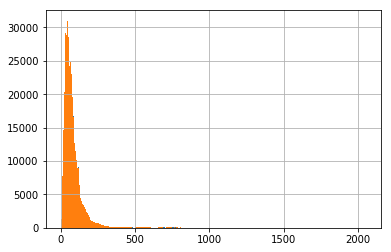

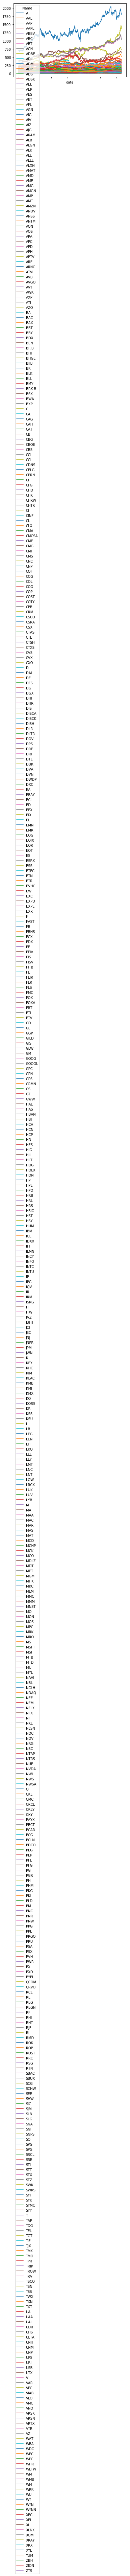

In [11]:
#plot histogram of open, close price, and plot all the open price data
df.open.hist(bins=500)
df.close.hist(bins=500)
df.set_index(['date','Name']).unstack().open.plot()

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
date        Name 
2015-07-02  NI      -0.951660
2015-07-20  EBAY    -0.898506
2014-08-07  DISCK   -0.693511
            DISCA   -0.661197
2015-07-01  BAX     -0.638836
2014-05-19  CHD     -0.585683
2014-01-16  BBY     -0.364364
2017-09-14  NWL     -0.354583
2017-11-01  EVHC    -0.332712
dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
date        Name
2015-08-28  FCX     0.272210
2016-01-22  MRO     0.273714
2017-11-17  FL      0.277332
2018-01-29  DPS     0.282272
2017-09-14  MRO     0.285211
2016-03-04  CHK     0.308967
2017-09-15  NWL     0.326689
2013-04-19  VRTX    0.409643
2014-06-24  VRTX    0.409862
2014-05-20  CHD     0.590860
dtype: float64


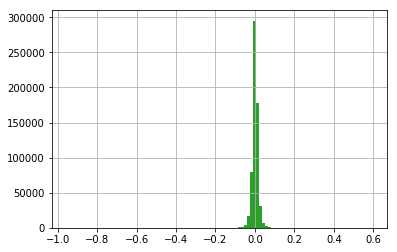

In [12]:
#Rank and plot returns, and find unusual returns
def rank_returns():
    df_open = df.set_index(['date','Name']).unstack().open
    df_return = np.log(df_open).diff().stack()
    print(df_return.hist(bins=100))
    return df_return.sort_values()

rank_returns()
print(rank_returns()[:9])
print(rank_returns()[-10:])
#Found unusual returns, eg. the first row: 2015-07-02; NI; -0.951660

In [13]:
#Further check what's wrong with 2015-07-02  NI  

def castDate(date):
    try:
        date = pd.Timestamp(date)
    except:
        date = np.datetime64('NaT')
    return date
df.date = list(map(castDate,df.date))

df[(df.Name=='NI')&(df.date>pd.Timestamp('2015-06-25'))&(df.date<pd.Timestamp('2015-07-10'))]
#Cross-check the price on yahoo finance: 1000/2545 Stock Split
#Similarly, Ebay also experienced sharesplit, and some other unusual returns are due to wrong data 

,date,open,high,low,close,volume,Name
410642,2015-06-26,46.53,46.53,46.105,46.25,2947353,NI
410643,2015-06-29,46.30,46.81,45.920,45.95,2179037,NI
410644,2015-06-30,45.61,46.02,45.440,45.59,2910080,NI
410645,2015-07-01,45.61,45.71,45.010,45.45,3740554,NI
410646,2015-07-02,17.61,17.94,16.910,16.99,16010299,NI
410647,2015-07-06,16.95,17.09,16.650,16.84,11162984,NI
410648,2015-07-07,16.96,17.14,16.700,17.12,10865443,NI
410649,2015-07-08,17.09,17.32,16.950,17.14,7037833,NI
410650,2015-07-09,17.47,17.47,16.750,16.75,6645525,NI


In [14]:
#Find unreasonable values, eg. high < low
df[~(df.high>=df.low) | (df.high<df.open) | (df.high<df.close) | (df.low>df.open) | (df.low>df.close)]

,date,open,high,low,close,volume,Name
53002,2014-05-19,23.890,23.5950,23.850,24.4450,1944854,AOS
78684,2016-03-14,33.550,33.7500,33.080,32.7200,6037794,BBY
82949,2017-07-26,NaN,NaN,NaN,69.0842,3,BHF
113362,2014-05-19,18.770,33.9525,33.695,33.8950,1078888,CHD
114650,2014-06-30,30.430,31.1000,30.370,29.3900,8132836,CHK
165571,2014-11-06,78.470,81.3050,80.490,81.2600,1614419,DHR
165857,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
239832,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV
303084,2014-07-01,50.850,51.0700,50.570,50.0900,5624981,IP
349476,2016-05-19,35.190,35.7850,35.085,17.8700,1231722,LNT


### Part (2): Data Formatting and Cleaning

In [15]:
import csv
import collections
import re
import pandas_datareader as pdr
from datetime import datetime 

def main():
    print("Initializing...")
    print("Reading Data...")
    filename = input("Please type the name of the file you want to use (without suffix): \n")
    Data = readdata(filename + '.csv')
    print("Formatting Data...")
    Formated_Data = [Data[0]] + cleandata(Data)
    Complete_Data = missing(Formated_Data) #Find and deal with missing data
    Clean_Data = wrong(Complete_Data)
    outfilename = input("Please specify the filename you want to write the cleaned data in: \n")
    with open(outfilename + '.csv', 'w') as fp:
        writer = csv.writer(fp)
        writer.writerows(Clean_Data)  # write data
    print("Output Data Complete!")        
    

In [16]:
#Read Data
def readdata(filename):
    # This function reads data from the original dataset
    with open(filename) as fp:
        reader = csv.reader(fp)
        data = list(reader)
        findata = [i for i in data if i[6] not in ['XL', 'CHK']] #Get rid of stocks not part of S&P 500 index
    return findata

def assetlist():
    # This function returns a set of tickers of S&P500 stocks
    n = readdata()
    k = [ i[6] for i in n]
    return set(k)


In [17]:
# Format Data
def cleanrow(row):
    namepattern = r'[A-Z]*' # To check that all tickers contains only capital letters
    datepattern = r'^(\d{4})-(\d{2})-(\d{2})$' # To check that the dates are in the YYYY-MM-DD format
    matchname = re.search(namepattern, row[6])
    matchdate = re.search(datepattern, row[0])
    
    new_row = [0, 0, 0, 0, 0, 0, 0]
    new_row[0] = row[0] if bool(matchdate) == True else None 
    new_row[1] = round(float(row[1]),2) if row[1] else None
    new_row[2] = round(float(row[2]),2) if row[2] else None
    new_row[3] = round(float(row[3]),2) if row[3] else None
    new_row[4] = round(float(row[4]),2) if row[4] else None
    new_row[5] = int(row[5]) if row[5].isdigit() else None
    new_row[6] = row[6] if bool(matchname) == True else None
    # format the original data, also check for missing data and some cases of wrong data
    # missing and wrong data are replaced by None so we could deal with them more efficiently
    # in the future 
    return new_row

def cleandata(dataset):
    data = dataset[1:]
    for i in range(len(data)):
        data[i] = cleanrow(data[i])
    return data


In [18]:
# Find possible wrong value
# Find missing value

def missing_value(data):
    missing_value = []
    
    for i in range(1, len(data)):
        if None in data[i]:
            missing_value.append(i)
            # find the index of rows with missing value  
        else:
            pass
    return missing_value


In [19]:
# Using webcrawler to fill in the missing data
# and check for the wrong data
def get_data(ticker, date1, date2, category):
    year1, month1, day1 = int(date1.split('-')[0]), int(date1.split('-')[1]), int(date1.split('-')[2])
    year2, month2, day2 = int(date2.split('-')[0]), int(date2.split('-')[1]), int(date2.split('-')[2])
    data = pdr.get_data_yahoo(symbols = ticker, start = datetime(year1, month1, day1), end = datetime(year2, month2, day2))
    n = data[category]
    # The module does not allow us to query data for a single date, so we query for 2 dates and take the first one
    return round(float(n[0]),2)

def get_missing(row1, row2, data):
    for i in range(len(row1)):
        if row1[i] == None:
            category = data[0][i].capitalize()
            datapoint = get_data(row1[6], row1[0], row2[0], category)
            row1[i] = datapoint
        else:
            pass
    return row1

def missing(data):
    print("Finding Missing Values...")
    missing_rows = missing_value(data)
    print("Fill in Missing Values...")
    for i in missing_rows:
        print(i)
        print(data[i])
        get_missing(data[i], data[i+1], data)
        print(data[i])
    print("Missing Data Resolution Complete!")
    return data


In [20]:
def wrong_value(data):    
    suspicious_high = []
    suspicious_low = []
    suspicious_openclose = []
    suspicious_sharesplit = []
    
    for i in range(1, len(data)-1):
        if ((data[i][2] - data[i][3])/data[i][3]) >= 0.4:
            suspicious_high.append(i)
            suspicious_low.append(i)
            # find suspicious high-low gap
        elif abs((data[i][1] - data[i][4])/data[i][4]) >= 0.4:
            suspicious_openclose.append(i)
            # find suspicious open-close gap
        elif data[i][2] < data[i][1] or data[i][2] < data[i][3] or data[i][2] < data[i][4]:
            suspicious_high.append(i)
            # find low, open, close value greater than the high value
        elif data[i][3] > data[i][1] or data[i][3] > data[i][2] or data[i][3] > data[i][4]:
            suspicious_low.append(i)
            # find high, open, close value less than low value
        elif (data[i+1][4]-data[i][4])/data[i][4] < -0.5:
            if data[i+1][6] == data[i][6]:
                suspicious_sharesplit.append(i)
                suspicious_sharesplit.append(i+1)
            else:
                pass
            # find suspicious sharesplit cases
    return suspicious_high, suspicious_low, suspicious_openclose, suspicious_sharesplit
    
def get_high(data, row1, row2, cat_num = 2):
    datapoint = get_data(row1[6], row1[0], row2[0], data[0][cat_num].capitalize())
    row1[cat_num] = datapoint
    return row1

def get_low(data, row1, row2, cat_num = 3):
    datapoint = get_data(row1[6], row1[0], row2[0], data[0][cat_num].capitalize())
    row1[cat_num] = datapoint
    return row1

def get_open(data, row1, row2, cat_num = 1):
    datapoint = get_data(row1[6], row1[0], row2[0], data[0][cat_num].capitalize())
    row1[cat_num] = datapoint
    return row1

def get_close(data, row1, row2, cat_num = 4):
    datapoint = get_data(row1[6], row1[0], row2[0], data[0][cat_num].capitalize())
    row1[cat_num] = datapoint
    return row1

def wrong(data):
    print("Finding Potential Wrong Values")
    wrong_high_rows, wrong_low_rows, wrong_openclose_rows, sharesplit_rows = wrong_value(data)
    print("Correcting Suspicious 'High' Values")
    for i in wrong_high_rows:
        print(i)
        print(data[i])
        get_high(data, data[i], data[i+1])
        print(data[i])
    print("Suspicious 'High' Values Resolution Complete")
    print("Correcting Suspicious 'Low' Values")
    for i in wrong_low_rows:
        print(i)
        print(data[i])
        get_low(data, data[i], data[i+1])
        print(data[i])
    print("Suspicious 'Low' Values Resolution Complete")
    print("Correcting Suspicious 'Open' and 'Close' Values")
    for i in wrong_openclose_rows:
        print(i)
        print(data[i])
        get_open(data, data[i], data[i+1])
        get_close(data, data[i], data[i+1])
        print(data[i])
    print("Suspicious 'Open' and 'Close' Values Resolution Complete")
    print("Correcting Suspicious 'Sharesplit' Values")
    for i in sharesplit_rows:
        print(i)
        print(data[i])
        get_open(data, data[i], data[i+1])
        get_high(data, data[i], data[i+1])
        get_low(data, data[i], data[i+1])
        get_close(data, data[i], data[i+1])
        print(data[i])
    print("Suspicious 'Sharesplit' Values Resolution Complete")
    print("Wrong Values Resolution Complete")
    return data


In [21]:
main()

Initializing...
Reading Data...
Please type the name of the file you want to use (without suffix): 
all_stocks_5yr
Formatting Data...
Finding Missing Values...
Fill in Missing Values...
82950
['2017-07-26', None, None, None, 69.08, 3, 'BHF']
['2017-07-26', 69.08, 69.08, 69.08, 69.08, 3, 'BHF']
164476
['2015-07-17', None, 88.76, 88.24, 88.72, 2056819, 'DHR']
['2015-07-17', 67.08, 88.76, 88.24, 88.72, 2056819, 'DHR']
164599
['2016-01-12', None, None, None, 88.55, 0, 'DHR']
['2016-01-12', 67.95, 67.95, 66.26, 88.55, 0, 'DHR']
203818
['2015-07-17', None, 48.49, 47.85, 47.92, 1246786, 'ES']
['2015-07-17', 48.3, 48.49, 47.85, 47.92, 1246786, 'ES']
238574
['2016-07-01', None, None, None, 49.54, 0, 'FTV']
['2016-07-01', 49.4, 54.34, 48.4, 49.54, 0, 'FTV']
433121
['2015-07-17', None, 47.31, 46.83, 46.99, 1229513, 'O']
['2015-07-17', 47.2, 47.31, 46.83, 46.99, 1229513, 'O']
433244
['2016-01-12', None, None, None, 52.43, 0, 'O']
['2016-01-12', 52.52, 52.59, 51.76, 52.43, 0, 'O']
477336
['2015-06-

In [ ]:
class Equity:
    def __init__(self, name):
        self.name = name
        self.history = [dataset[0]]+[i for i in cleandata if i[6] == name]
    
    def RoR(self, day1, day2):
        s = [i[4] for i in self.history if i[0] == day1][0]
        St = [i[4] for i in self.history if i[0] == day2][0]
        return (St/s)-1